In [8]:
import pandas as pd
import helper
import re
import html
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./data/comments.csv')
df.head()

,emotion,video_id,author,comment
0,vui vẻ,_pMLRYGx9Is,@ottux2707,Ai đó rì viu DHHP cho em vớiii
1,vui vẻ,_pMLRYGx9Is,@minhchau3090,Tính cả mình thì khóa mình có 5 người trong Bộ...
2,vui vẻ,_pMLRYGx9Is,@yennhile8168,Ê em là 2k8 lo xa đag tìm trường đhoc:)) e xem...
3,vui vẻ,_pMLRYGx9Is,@tuantruong2080,anh làm p2 cho 2k7 đc ko
4,vui vẻ,_pMLRYGx9Is,@johnnyphim5572,FTU giỏi lắm đó


In [3]:
def clean_comment(text: str):
    if not isinstance(text, str):
        return ""
    text = html.unescape(text)  # Decode HTML entities
    text = re.sub(r"<.*?>", "", text)  # Xoá HTML tags
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Xoá URL
    text = re.sub(r"@\w+", "", text)  # Xoá @user
    text = re.sub(r"[^\w\sàáảãạâấầẩẫậăắằẳẵặèéẻẽẹêếềểễệìíỉĩịòóỏõọôốồổỗộơớờởỡợùúủũụưứừửữựỳýỷỹỵđA-Z]", " ", text, flags=re.UNICODE)
    text = re.sub(r"\s+", " ", text).strip()
    return text.lower()


def filter_comments(df: pd.DataFrame, min_length: int = 5) -> pd.DataFrame:
    """
    Filter out comments that are not bring any value
    """
    df = df[df["clean_comment"].str.len() > min_length]
    df = df.dropna(subset=["clean_comment"])
    df = df[df["clean_comment"].str.strip() != ""]
    return df

In [7]:
# Main
bef_length = len(df)
df["clean_comment"] = df["comment"].apply(clean_comment)
df = filter_comments(df)
aft_length = len(df)
print(f"Removed {bef_length - aft_length} comments")
df = df.reset_index(drop=True)
df = df.drop(columns=["comment"])
df = df.rename(columns={"clean_comment": "comment"})
df.to_csv("./data/clean_comments.csv", index=False)

Removed 0 comments


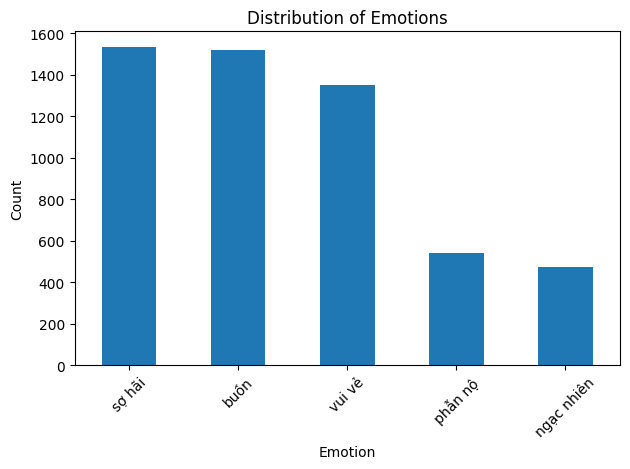

In [10]:
# Plot distribution by emotion
def plot_distribution(df: pd.DataFrame):
    df["emotion"].value_counts().plot(kind="bar")
    plt.title("Distribution of Emotions")
    plt.xlabel("Emotion")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("./data/emotion_distribution.png")
    plt.show()

plot_distribution(df)